In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data is too large, it can be downloaded from [poker_hand](https://archive.ics.uci.edu/ml/datasets/Poker+Hand)

In [2]:
# Because of data size we will use testing data as training and viceversa
data = pd.read_csv('poker-hand-testing.data')

In [3]:
data

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [4]:
data.set_axis(['suit1','rank1','suit2','rank2','suit3','rank3',
               'suit4','rank4','suit5','rank5','poker_hand'], axis=1, inplace=True)

In [5]:
data

,suit1,rank1,suit2,rank2,suit3,rank3,suit4,rank4,suit5,rank5,poker_hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [6]:
data['poker_hand'].value_counts()

0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: poker_hand, dtype: int64

Hands to be decoded as follows:\
0: Nothing in hand; not a recognized poker hand\
1: One pair; one pair of equal ranks within five cards\
2: Two pairs; two pairs of equal ranks within five cards\
3: Three of a kind; three equal ranks within five cards\
4: Straight; five cards, sequentially ranked with no gaps\
5: Flush; five cards with the same suit\
6: Full house; pair + different rank three of a kind\
7: Four of a kind; four equal ranks within five cards\
8: Straight flush; straight + flush\
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

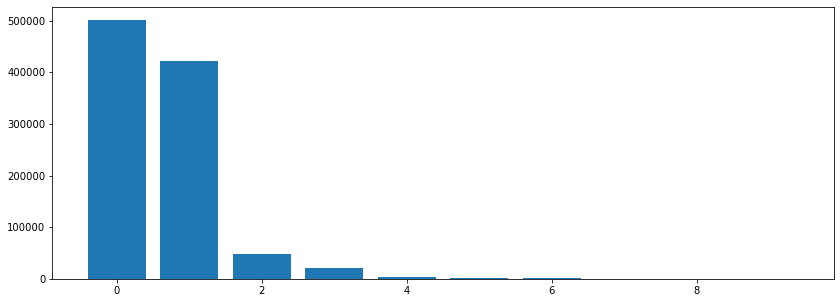

In [7]:
plt.figure(figsize=(14, 5))
plt.bar(data['poker_hand'].value_counts().index, data['poker_hand'].value_counts());

In [8]:
# Hands count roughly reflects their outcome problabilities

In [9]:
#data is already encoded for classifying 
from sklearn.neighbors import KNeighborsClassifier

test_data = pd.read_csv('poker-hand-training-true.data')

X = data.iloc[:,0:10]
y = data.iloc[:,10]

X_test = test_data.iloc[:,0:10]
y_test = test_data.iloc[:,10]

We will now import the necessary libraries. In order to get the best K we will iterate until we find the one that gives the best accuracy. The iteration will stop when 3 Ks in a row proved no improvement on accuracy. Then the best model parameters will be restore for further use.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [11]:
best_score = 0
patience_check = 0
for i in range(1,202,2):  #Ks are odd
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    score = model.score(X_test,y_test)
    if score > best_score:
        knnPickle = open('knnpickle_file', 'wb') 
        patience_check = 0
        best_score = score
        pickle.dump(model, knnPickle)  # saving  the model
        k = i
    else:
        patience_check += 1
    if patience_check == 3 or i == 201:
        model = pickle.load(open('knnpickle_file', 'rb')) # restoring the model
        print('Best accuracy is:', best_score,'with K:',k)
        break
    print('Tested with k:',i,'with score:',score)

Tested with k: 1 with score: 0.60688
Tested with k: 3 with score: 0.61636
Tested with k: 5 with score: 0.62388
Tested with k: 7 with score: 0.62516
Tested with k: 9 with score: 0.6306
Tested with k: 11 with score: 0.63152
Tested with k: 13 with score: 0.63332
Tested with k: 15 with score: 0.63716
Tested with k: 17 with score: 0.63716
Tested with k: 19 with score: 0.6396
Tested with k: 21 with score: 0.64124
Tested with k: 23 with score: 0.64008
Tested with k: 25 with score: 0.6402
Tested with k: 27 with score: 0.64308
Tested with k: 29 with score: 0.64272
Tested with k: 31 with score: 0.63992
Tested with k: 33 with score: 0.644
Tested with k: 35 with score: 0.64344
Tested with k: 37 with score: 0.64168
Best accuracy is: 0.644 with K: 33


Considering that the chance to get the right poker hand by just guessing is 1 out of 10, the model still predicts a lot better than chance. Anyway the performance is not very good. Probably it depends on the fact that the same hand is described by different permutation of cards and not every card is related to the actual hand (e.g. pair where only 2 cards out of 5 are important) providing a lot of noise. So another kind of model could be better suited for this particular task. 